<a href="https://colab.research.google.com/github/bhkpriyanka/EIP4/blob/master/Session3/Session3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ASSIGNMENT 3:***  
*Add new cells at the bottom of the code, and write your own network such that:*  
* *it uses depthwise separable convolution ONLY (no Conv2D)*  
* *it uses BatchNormalization*  
* *has less than 100,000 parameters*  
* *it uses proper dropout values*  
* *you've mentioned the output size for each layer* 
* *you've mentioned the receptive field for each layer* 
* *runs for 50 epochs* 
* *beats the validation score within 50 epochs (at any epoch run, doesn't need to be final one)*

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D, SeparableConv2D
from keras.layers.pooling import GlobalAveragePooling2D 
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))


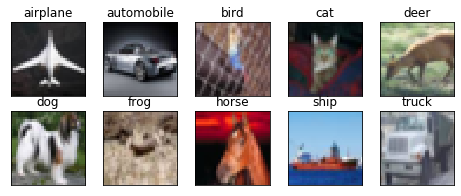

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(filters=32,kernel_size=3,activation='relu',use_bias =False,padding='same',input_shape=(32, 32, 3))) #RF=3;Cout=32x32x32
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters=64,kernel_size=3,activation='relu',use_bias =False,padding='same')) #RF=5;Cout=32x32x64
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters=100,kernel_size=3,activation='relu',use_bias =False,padding='same')) #RF=7;Cout=32x32x100
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2))) #RF=8;Cout=16x16x100
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters=64,kernel_size=3,activation='relu',use_bias =False,padding='same')) #RF=12;Cout=16x16x64
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters=100,kernel_size=3,activation='relu',use_bias =False,padding='same')) #RF=16;Cout=16x16x100
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters=150,kernel_size=3,activation='relu',use_bias =False,padding='same')) #RF=20;Cout=16x16x150
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2))) #RF=22;Cout=8x8x150
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters=100,kernel_size=3,activation='relu',use_bias =False,padding='same')) #RF=30;Cout=8x8x100
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(filters=200,kernel_size=3,activation='relu',use_bias =False,padding='valid')) #RF=38;Cout=6X6X200
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(GlobalAveragePooling2D()) #200
model.add(Dense(64, activation='relu',use_bias =False)) #64
model.add(Dense(num_classes, activation='softmax',use_bias =False)) #10

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 32)        123       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 32, 32, 64)        2336      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 32, 32, 100)      

In [9]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.006 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.006), metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`




Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.006.
390/390 [==============================] - 27s 70ms/step - loss: 1.5019 - acc: 0.4510 - val_loss: 2.8853 - val_acc: 0.3993
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0045489007.
390/390 [==============================] - 23s 60ms/step - loss: 1.1219 - acc: 0.6010 - val_loss: 1.2414 - val_acc: 0.6004
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0036630037.
390/390 [==============================] - 23s 60ms/step - loss: 0.9614 - acc: 0.6604 - val_loss: 0.9373 - val_acc: 0.6871
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0030659172.
390/390 [==============================] - 23s 60ms/step - loss: 0.8635 - acc: 0.6947 - val_loss: 0.7840 - val_acc: 0.7301
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0026362039.
390/390 [==============================] - 23s 60ms/step - loss: 0.7915 - acc: 0.72

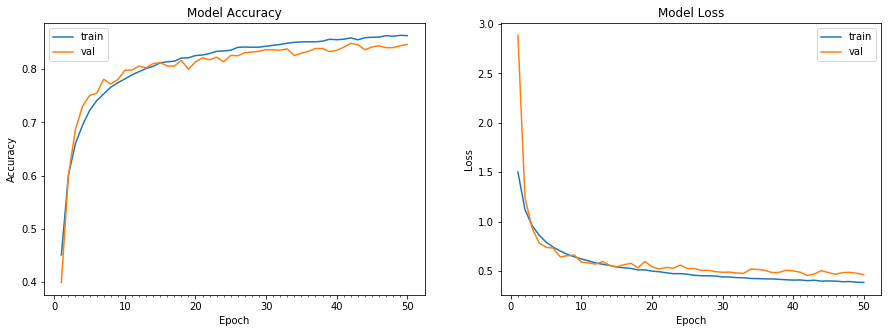

Accuracy on test data is: 84.61


In [10]:
from keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(rotation_range=40, 
                             #width_shift_range=0.2,
                             #height_shift_range=0.2,
                             #shear_range=0.2,
                             #zoom_range=0.2,
                             #horizontal_flip=True,
                             #fill_mode='nearest')

datagen = ImageDataGenerator(horizontal_flip=False,
                             zoom_range=0.2,
                             rotation_range = 20)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)        
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))